# Overlap


We now check for overlapping entry points between the daily data and the annual data

We will keep these columns:
- Year
- Month
- Day
- Long
- Lat

If those match up within 0.05 lat/long distance error we consider it an overlap

In [149]:
import pandas as pd
import os
from pathlib import Path 
from typing import Union
import numpy as np
import pandas as pd
import us      

In [32]:
ann_2024_path = "data/Storm_Reports/filtered/Storm_Reports_2024_latlong.csv"

In [33]:
ann_2024 = pd.read_csv(ann_2024_path)

In [34]:
ann_2024

,YEAR,MONTH_NAME,BEGIN_DAY,END_DAY,EVENT_TYPE,STATE,CZ_TYPE,CZ_NAME,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,MONTH_NUM
0,2024,January,8,8,Hail,TEXAS,C,AUSTIN,30.0414,-96.3191,30.0414,-96.3191,1
1,2024,January,8,8,Hail,TEXAS,C,COLORADO,29.5000,-96.5700,29.5000,-96.5700,1
2,2024,January,8,8,Hail,MISSISSIPPI,C,WASHINGTON,33.1400,-91.0660,33.1400,-91.0660,1
3,2024,January,8,8,Hail,MISSISSIPPI,C,YAZOO,32.8500,-90.4100,32.8500,-90.4100,1
4,2024,January,8,8,Hail,MISSISSIPPI,C,FORREST,31.0400,-89.1800,31.0400,-89.1800,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36499,2024,December,29,29,Tornado,GEORGIA,C,MERIWETHER,33.2174,-84.5236,33.2210,-84.5210,12
36500,2024,December,29,29,Tornado,GEORGIA,C,COWETA,33.2210,-84.5210,33.2620,-84.5100,12
36501,2024,December,29,29,Tornado,GEORGIA,C,FAYETTE,33.3379,-84.4562,33.3441,-84.4299,12
36502,2024,December,29,29,Tornado,GEORGIA,C,COBB,34.0332,-84.4893,34.0336,-84.4848,12


In [35]:
import us

def get_abbrev(name):
    s = us.states.lookup(name)
    return s.abbr if s else None

ann_2024["STATE"] = ann_2024["STATE"].apply(get_abbrev)
ann_2024


,YEAR,MONTH_NAME,BEGIN_DAY,END_DAY,EVENT_TYPE,STATE,CZ_TYPE,CZ_NAME,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,MONTH_NUM
0,2024,January,8,8,Hail,TX,C,AUSTIN,30.0414,-96.3191,30.0414,-96.3191,1
1,2024,January,8,8,Hail,TX,C,COLORADO,29.5000,-96.5700,29.5000,-96.5700,1
2,2024,January,8,8,Hail,MS,C,WASHINGTON,33.1400,-91.0660,33.1400,-91.0660,1
3,2024,January,8,8,Hail,MS,C,YAZOO,32.8500,-90.4100,32.8500,-90.4100,1
4,2024,January,8,8,Hail,MS,C,FORREST,31.0400,-89.1800,31.0400,-89.1800,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36499,2024,December,29,29,Tornado,GA,C,MERIWETHER,33.2174,-84.5236,33.2210,-84.5210,12
36500,2024,December,29,29,Tornado,GA,C,COWETA,33.2210,-84.5210,33.2620,-84.5100,12
36501,2024,December,29,29,Tornado,GA,C,FAYETTE,33.3379,-84.4562,33.3441,-84.4299,12
36502,2024,December,29,29,Tornado,GA,C,COBB,34.0332,-84.4893,34.0336,-84.4848,12


In [36]:
filtered_ann_2024 = ann_2024[["MONTH_NUM", "BEGIN_DAY", "EVENT_TYPE","STATE","BEGIN_LAT","BEGIN_LON"]]
filtered_ann_2024

,MONTH_NUM,BEGIN_DAY,EVENT_TYPE,STATE,BEGIN_LAT,BEGIN_LON
0,1,8,Hail,TX,30.0414,-96.3191
1,1,8,Hail,TX,29.5000,-96.5700
2,1,8,Hail,MS,33.1400,-91.0660
3,1,8,Hail,MS,32.8500,-90.4100
4,1,8,Hail,MS,31.0400,-89.1800
...,...,...,...,...,...,...
36499,12,29,Tornado,GA,33.2174,-84.5236
36500,12,29,Tornado,GA,33.2210,-84.5210
36501,12,29,Tornado,GA,33.3379,-84.4562
36502,12,29,Tornado,GA,34.0332,-84.4893


In [37]:
filtered_ann_2024['BEGIN_LAT'] = filtered_ann_2024['BEGIN_LAT'].round(2)
filtered_ann_2024['BEGIN_LON'] = filtered_ann_2024['BEGIN_LON'].round(2)

/var/folders/m8/6vszwx195fl9598f558j20ph0000gn/T/ipykernel_28079/2374897376.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_ann_2024['BEGIN_LAT'] = filtered_ann_2024['BEGIN_LAT'].round(2)
/var/folders/m8/6vszwx195fl9598f558j20ph0000gn/T/ipykernel_28079/2374897376.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_ann_2024['BEGIN_LON'] = filtered_ann_2024['BEGIN_LON'].round(2)


In [38]:
filtered_ann_2024 = filtered_ann_2024.rename(columns={'BEGIN_DAY':'DAY','BEGIN_LAT': 'LAT','BEGIN_LON':'LON','MONTH_NUM':'MONTH'})

In [39]:
filtered_ann_2024

,MONTH,DAY,EVENT_TYPE,STATE,LAT,LON
0,1,8,Hail,TX,30.04,-96.32
1,1,8,Hail,TX,29.50,-96.57
2,1,8,Hail,MS,33.14,-91.07
3,1,8,Hail,MS,32.85,-90.41
4,1,8,Hail,MS,31.04,-89.18
...,...,...,...,...,...,...
36499,12,29,Tornado,GA,33.22,-84.52
36500,12,29,Tornado,GA,33.22,-84.52
36501,12,29,Tornado,GA,33.34,-84.46
36502,12,29,Tornado,GA,34.03,-84.49


In [40]:
daily_2024_path = "Daily_combined/Daily_combined_2024.csv"

In [41]:
daily_2024 = pd.read_csv(daily_2024_path)

In [42]:
daily_2024.head(5)

,EVENT_TYPE,Unnamed: 0,Time,Size,Location,County,State,Lat,Lon,Comments,Day,Month,Speed,F_Scale
0,Hail,0,1752,200.0,6 S Lake Charles,Calcasieu,LA,30.13,-93.22,2 inch hail observed at the Lake Charles Natio...,8.0,1,NaN,NaN
1,Hail,1,1810,200.0,2 E Lake Charles,Calcasieu,LA,30.22,-93.16,2 Inch hail in downtown Lake Charles over towa...,8.0,1,NaN,NaN
2,Hail,2,1824,100.0,Gillis,Calcasieu,LA,30.38,-93.20,Social media picture of quarter size hail. (LCH),8.0,1,NaN,NaN
3,Hail,3,1954,100.0,Belmont,Gonzales,TX,29.52,-97.69,Report from mPING Quarter (1.00 in.). (EWX),8.0,1,NaN,NaN
4,Hail,4,1958,225.0,Belmont,Gonzales,TX,29.52,-97.68,Emergency manager sent a picture of 2.25 inch ...,8.0,1,NaN,NaN


In [43]:
filtered_daily_2024 = daily_2024[["Month","Day","EVENT_TYPE","State", "Lat","Lon"]]
filtered_daily_2024['Day']=filtered_daily_2024['Day'].fillna(0).astype('Int64')
filtered_daily_2024

/var/folders/m8/6vszwx195fl9598f558j20ph0000gn/T/ipykernel_28079/1511894558.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_daily_2024['Day']=filtered_daily_2024['Day'].fillna(0).astype('Int64')


,Month,Day,EVENT_TYPE,State,Lat,Lon
0,1,8,Hail,LA,30.13,-93.22
1,1,8,Hail,LA,30.22,-93.16
2,1,8,Hail,LA,30.38,-93.20
3,1,8,Hail,TX,29.52,-97.69
4,1,8,Hail,TX,29.52,-97.68
...,...,...,...,...,...,...
35448,12,29,Tornado,SC,35.11,-81.30
35449,12,29,Tornado,NC,35.22,-80.97
35450,12,29,Tornado,OH,40.22,-83.40
35451,12,29,Tornado,AL,32.67,-87.82


In [44]:
filtered_daily_2024 = filtered_daily_2024.rename(columns={'Month': 'MONTH','Day':'DAY','State':'STATE','Lat':'LAT','Lon':'LON'})

In [45]:
filtered_daily_2024

,MONTH,DAY,EVENT_TYPE,STATE,LAT,LON
0,1,8,Hail,LA,30.13,-93.22
1,1,8,Hail,LA,30.22,-93.16
2,1,8,Hail,LA,30.38,-93.20
3,1,8,Hail,TX,29.52,-97.69
4,1,8,Hail,TX,29.52,-97.68
...,...,...,...,...,...,...
35448,12,29,Tornado,SC,35.11,-81.30
35449,12,29,Tornado,NC,35.22,-80.97
35450,12,29,Tornado,OH,40.22,-83.40
35451,12,29,Tornado,AL,32.67,-87.82


In [46]:
filtered_ann_2024

,MONTH,DAY,EVENT_TYPE,STATE,LAT,LON
0,1,8,Hail,TX,30.04,-96.32
1,1,8,Hail,TX,29.50,-96.57
2,1,8,Hail,MS,33.14,-91.07
3,1,8,Hail,MS,32.85,-90.41
4,1,8,Hail,MS,31.04,-89.18
...,...,...,...,...,...,...
36499,12,29,Tornado,GA,33.22,-84.52
36500,12,29,Tornado,GA,33.22,-84.52
36501,12,29,Tornado,GA,33.34,-84.46
36502,12,29,Tornado,GA,34.03,-84.49


In [47]:
filtered_ann_2024['EVENT_TYPE'].unique()

array(['Hail', 'High Wind', 'Strong Wind', 'Thunderstorm Wind', 'Tornado'],
      dtype=object)

In [48]:
filtered_ann_2024['EVENT_TYPE'] = filtered_ann_2024['EVENT_TYPE'].replace(r'.*Wind$', 'Wind', regex=True)

In [49]:
filtered_ann_2024

,MONTH,DAY,EVENT_TYPE,STATE,LAT,LON
0,1,8,Hail,TX,30.04,-96.32
1,1,8,Hail,TX,29.50,-96.57
2,1,8,Hail,MS,33.14,-91.07
3,1,8,Hail,MS,32.85,-90.41
4,1,8,Hail,MS,31.04,-89.18
...,...,...,...,...,...,...
36499,12,29,Tornado,GA,33.22,-84.52
36500,12,29,Tornado,GA,33.22,-84.52
36501,12,29,Tornado,GA,33.34,-84.46
36502,12,29,Tornado,GA,34.03,-84.49


In [77]:
df_daily = filtered_daily_2024.copy()
df_ann   = filtered_ann_2024.copy()

df_daily = df_daily.reset_index().rename(columns={'index':'idx_daily'})
df_ann   = df_ann.reset_index().rename(columns={'index':'idx_ann'})
df_daily

,idx_daily,MONTH,DAY,EVENT_TYPE,STATE,LAT,LON
0,0,1,8,Hail,LA,30.13,-93.22
1,1,1,8,Hail,LA,30.22,-93.16
2,2,1,8,Hail,LA,30.38,-93.20
3,3,1,8,Hail,TX,29.52,-97.69
4,4,1,8,Hail,TX,29.52,-97.68
...,...,...,...,...,...,...,...
35448,35448,12,29,Tornado,SC,35.11,-81.30
35449,35449,12,29,Tornado,NC,35.22,-80.97
35450,35450,12,29,Tornado,OH,40.22,-83.40
35451,35451,12,29,Tornado,AL,32.67,-87.82


In [78]:
df_daily['LAT'] = pd.to_numeric(df_daily['LAT'], errors='coerce')
df_daily['LON'] = pd.to_numeric(df_daily['LON'], errors='coerce')

df_ann['LAT'] = pd.to_numeric(df_ann['LAT'], errors='coerce')
df_ann['LON'] = pd.to_numeric(df_ann['LON'], errors='coerce')

df_daily = df_daily.dropna(subset=['LAT','LON'])
df_ann   = df_ann.dropna(subset=['LAT','LON'])

In [79]:
keys = ['MONTH','DAY','EVENT_TYPE','STATE']

loose = pd.merge(
    df_daily,
    df_ann,
    left_on=keys,
    right_on=keys,
    how='inner',
    suffixes=('_daily','_ann')
)

In [80]:
loose['dLAT'] = loose['LAT_daily'] - loose['LAT_ann']
loose['dLON'] = loose['LON_daily'] - loose['LON_ann']
loose['dist_deg'] = np.sqrt(loose['dLAT']**2 + loose['dLON']**2)

tolerance = 0.05
matched = loose[loose['dist_deg'] <= tolerance].copy()

print(f"Potential near‐matches (within ±{tolerance}°): {len(matched)}")

Potential near‐matches (within ±0.05°): 44858


In [111]:
num_daily_matched = matched['idx_daily'].nunique()
num_daily_total   = len(df_daily)
num_daily_unmatched = num_daily_total - num_daily_matched

print(f"Daily rows total    : {num_daily_total}")
print(f"Daily rows matched  : {num_daily_matched}")
print(f"Daily rows unmatched: {num_daily_unmatched}")


Daily rows total    : 35451
Daily rows matched  : 27291
Daily rows unmatched: 8160


In [82]:
num_ann_matched = matched['idx_ann'].nunique()
num_ann_total   = df_ann.shape[0]
num_ann_unmatched = num_ann_total - num_ann_matched

print(f"Annual rows total    : {num_ann_total}")
print(f"Annual rows matched  : {num_ann_matched}")
print(f"Annual rows unmatched: {num_ann_unmatched}")


Annual rows total    : 31197
Annual rows matched  : 25502
Annual rows unmatched: 5695


In [101]:
overlap_pairs = matched[['idx_daily','idx_ann','EVENT_TYPE','STATE','MONTH','DAY']].drop_duplicates()

In [145]:
summary_by_type = overlap_pairs.groupby('EVENT_TYPE').agg({
    'idx_daily': lambda s: s.nunique(),
    'idx_ann':   lambda s: s.nunique()
}).rename(columns={'idx_daily': 'daily_matched_count',
                   'idx_ann':   'ann_matched_count'})

summary_by_type

,daily_matched_count,ann_matched_count
EVENT_TYPE,,
Hail,7462,7169
Tornado,1496,1359
Wind,18333,16974


In [146]:
summary_by_type['daily_matched_count'].sum()/len(filtered_daily_2024)

np.float64(0.7697797083462612)

In [147]:
summary_by_type['ann_matched_count'].sum()/len(filtered_ann_2024)

np.float64(0.6986083716852948)

In [ ]:
def abbreviate_state(full_name: str) -> Union[str, float]:
    """Nort Carolina -> NC."""
    s = us.states.lookup(full_name)
    return s.abbr if s else np.nan


In [ ]:
def _clean_event_type(s: pd.Series) -> pd.Series:
    wind_re = r'^(Thunderstorm|Strong|High)\s+Wind$'
    return (
        s.str.strip()
         .replace(wind_re, 'Wind', regex=True)
    )


In [150]:
def process_one_year(
    year: int,
    ann_folder: str | Path = "data/Storm_Reports/filtered",
    daily_folder: str | Path = "Daily_combined",
    tolerance: float = 0.05
) -> dict:

    ann_path = Path(ann_folder) / f"Storm_Reports_{year}_latlong.csv"
    if not ann_path.is_file():
        raise FileNotFoundError(f"Annual file not found: {ann_path}")

    ann = pd.read_csv(ann_path)

    ann["STATE"] = ann["STATE"].map(abbreviate_state)
    ann = (ann
           .rename(columns={
               "MONTH_NUM": "MONTH",
               "BEGIN_DAY":  "DAY",
               "BEGIN_LAT":  "LAT",
               "BEGIN_LON":  "LON"
           })
           [["MONTH", "DAY", "EVENT_TYPE", "STATE", "LAT", "LON"]]
           .copy())

    ann["EVENT_TYPE"] = _clean_event_type(ann["EVENT_TYPE"])
    ann[["LAT", "LON"]] = (
        ann[["LAT", "LON"]]
        .apply(pd.to_numeric, errors="coerce")
        .round(2)
    )
    ann = ann.dropna(subset=["LAT", "LON"]).reset_index(drop=True)
    ann = ann.reset_index(names="idx_ann")

    daily_path = Path(daily_folder) / f"Daily_combined_{year}.csv"
    if not daily_path.is_file():
        raise FileNotFoundError(f"Daily file not found: {daily_path}")

    daily = pd.read_csv(daily_path)

    daily = (daily
             .rename(columns={
                 "Month": "MONTH",
                 "Day":   "DAY",
                 "State": "STATE",
                 "Lat":   "LAT",
                 "Lon":   "LON"
             })
             [["MONTH", "DAY", "EVENT_TYPE", "STATE", "LAT", "LON"]]
             .copy())

    daily["EVENT_TYPE"] = _clean_event_type(daily["EVENT_TYPE"])
    daily["DAY"] = daily["DAY"].fillna(0).astype(int)
    daily[["LAT", "LON"]] = (
        daily[["LAT", "LON"]]
        .apply(pd.to_numeric, errors="coerce")
        .round(2)
    )
    daily = daily.dropna(subset=["LAT", "LON"]).reset_index(drop=True)
    daily = daily.reset_index(names="idx_daily")

    keys = ["MONTH", "DAY", "EVENT_TYPE", "STATE"]
    merged = (
        pd.merge(
            daily, ann,
            on=keys,
            how="inner",
            suffixes=("_daily", "_ann")
        )
        .assign(
            dLAT=lambda df: df["LAT_daily"] - df["LAT_ann"],
            dLON=lambda df: df["LON_daily"] - df["LON_ann"]
        )
        .assign(dist_deg=lambda df: np.hypot(df["dLAT"], df["dLON"]))
    )

    matched = merged.loc[merged["dist_deg"] <= tolerance].copy()

    num_daily_total     = daily.shape[0]
    num_daily_matched   = matched["idx_daily"].nunique()
    num_daily_unmatched = num_daily_total - num_daily_matched

    num_ann_total       = ann.shape[0]
    num_ann_matched     = matched["idx_ann"].nunique()
    num_ann_unmatched   = num_ann_total - num_ann_matched

    summary_by_type = (
        matched
        .groupby("EVENT_TYPE")
        .agg(
            daily_matched_count=("idx_daily", "nunique"),
            ann_matched_count=("idx_ann",    "nunique")
        )
        .reset_index()
    )

    return {
        "year": year,
        "num_daily_total":     num_daily_total,
        "num_daily_matched":   num_daily_matched,
        "num_daily_unmatched": num_daily_unmatched,
        "num_ann_total":       num_ann_total,
        "num_ann_matched":     num_ann_matched,
        "num_ann_unmatched":   num_ann_unmatched,
        "summary_by_type":     summary_by_type,
        "matched_pairs":       matched
    }

In [151]:
all_years      = range(2005, 2025)
yearly_metrics = []
yearly_details = {}

for yr in all_years:
    try:
        res = process_one_year(yr)
    except FileNotFoundError as e:
        print(f"Skipping {yr}: {e}")
        continue

    yearly_metrics.append({
        "year":            yr,
        "daily_total":     res["num_daily_total"],
        "daily_matched":   res["num_daily_matched"],
        "daily_unmatched": res["num_daily_unmatched"],
        "ann_total":       res["num_ann_total"],
        "ann_matched":     res["num_ann_matched"],
        "ann_unmatched":   res["num_ann_unmatched"],
    })

    yearly_details[yr] = res["matched_pairs"]

df_yearly = (
    pd.DataFrame(yearly_metrics)
    .sort_values("year")
    .reset_index(drop=True)
)

df_yearly["daily_match_pct"] = (
    df_yearly["daily_matched"] / df_yearly["daily_total"] * 100
).round(2)
df_yearly["ann_match_pct"] = (
    df_yearly["ann_matched"] / df_yearly["ann_total"] * 100
).round(2)

df_yearly


,year,daily_total,daily_matched,daily_unmatched,ann_total,ann_matched,ann_unmatched,daily_match_pct,ann_match_pct
0,2005,22739,16112,6627,27263,17106,10157,70.86,62.74
1,2006,26646,19301,7345,31658,20335,11323,72.43,64.23
2,2007,23042,18173,4869,26971,19303,7668,78.87,71.57
3,2008,31120,23757,7363,36883,25771,11112,76.34,69.87
4,2009,22899,17779,5120,27965,19466,8499,77.64,69.61
5,2010,21559,16686,4873,28179,18489,9690,77.40,65.61
6,2011,40150,30171,9979,40687,28771,11916,75.15,70.71
7,2012,29966,23928,6038,30678,23048,7630,79.85,75.13
8,2013,25533,20082,5451,25033,19030,6003,78.65,76.02
9,2014,24750,19879,4871,24859,19123,5736,80.32,76.93


### Year
The calendar year (2005 through 2024). This is the years that the two dataset overlap

### daily_total

The total number of “daily” storm records for that year.


### daily_matched

Out of those daily_total rows, how many found a matching “annual” record (within ±0.05° in lat/lon, on the same MONTH/DAY/EVENT_TYPE/STATE).

This is the count of unique idx_daily values that joined successfully to at least one row in the annual file.

### daily_unmatched

Daily_unmatched = daily_total – daily_matched.

It tells you how many “daily” events never matched any entry in the annual summary for that year.

### ann_total

The total number of “annual” storm records for that year.


### ann_matched

Out of those ann_total annual rows, how many actually found at least one corresponding “daily” record under the same MONTH/DAY/EVENT_TYPE/STATE and within the 0.05° lat/lon tolerance.

In other words, the number of unique idx_ann values that successfully merged back to the daily file.

### ann_unmatched

Simply ann_unmatched = ann_total – ann_matched.

It tells you how many “annual” events did not appear (within tolerance) in any daily file row for that same year.

## Interpretation

In [120]:
df_yearly['ann-daily match diff'] = df_yearly['ann_matched'] - df_yearly['daily_matched']

This is basically saying if the annual data set has the data from the daily data set then the larger the value would be
Inversely if it is negative then it is missing data that the daily data set has

We see that as the years go on the annual data set is missing more and omre, not great

In [121]:
df_yearly

,year,daily_total,daily_matched,daily_unmatched,ann_total,ann_matched,ann_unmatched,daily_match_pct,ann_match_pct,ann-daily match diff
0,2005,22739,16112,6627,27263,17106,10157,70.86,62.74,994
1,2006,26646,19301,7345,31658,20335,11323,72.43,64.23,1034
2,2007,23042,18173,4869,26971,19303,7668,78.87,71.57,1130
3,2008,31120,23757,7363,36883,25771,11112,76.34,69.87,2014
4,2009,22899,17779,5120,27965,19466,8499,77.64,69.61,1687
5,2010,21559,16686,4873,28179,18489,9690,77.40,65.61,1803
6,2011,40150,30171,9979,40687,28771,11916,75.15,70.71,-1400
7,2012,29966,23928,6038,30678,23048,7630,79.85,75.13,-880
8,2013,25533,20082,5451,25033,19030,6003,78.65,76.02,-1052
9,2014,24750,19879,4871,24859,19123,5736,80.32,76.93,-756


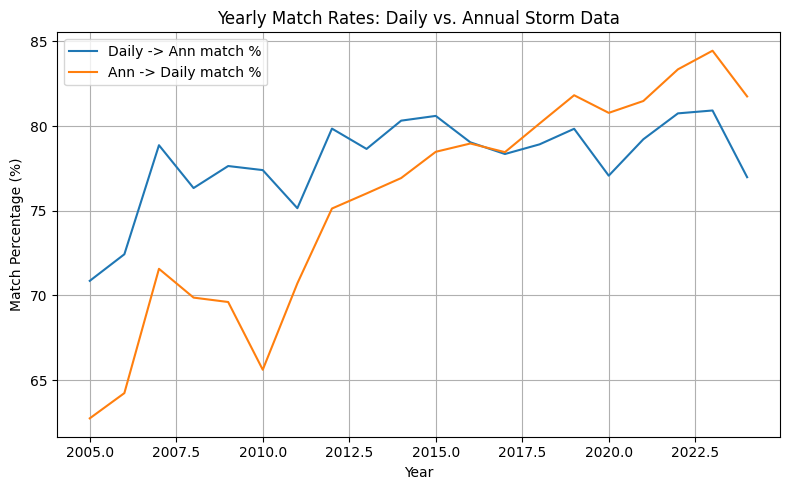

In [122]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(df_yearly['year'], df_yearly['daily_match_pct'], label='Daily -> Ann match %')
plt.plot(df_yearly['year'], df_yearly['ann_match_pct'],   label='Ann -> Daily match %')
plt.xlabel('Year')
plt.ylabel('Match Percentage (%)')
plt.title('Yearly Match Rates: Daily vs. Annual Storm Data')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Now we do it by state to see the spatial difference

In [ ]:
def abbreviate_state(name: str) -> str | float:
    s = us.states.lookup(name)
    return s.abbr if s else np.nan


In [140]:
def _clean_event_type(series: pd.Series) -> pd.Series:
    """

    We have 3 different wind categories in the annual dataset so we use regex
    Collapse High/Strong/Thunderstorm Wind into plain 'Wind'
    
    """
    wind_re = r'^(Thunderstorm|Strong|High)\s+Wind$'
    return series.str.strip().replace(wind_re, 'Wind', regex=True)


In [ ]:
def load_annual(year: int, folder: str | Path) -> pd.DataFrame:
    fp = Path(folder) / f"Storm_Reports_{year}_latlong.csv"
    ann = (pd.read_csv(fp)
           .assign(STATE=lambda df: df['STATE'].map(abbreviate_state))
           .rename(columns={"MONTH_NUM": "MONTH",
                            "BEGIN_DAY" : "DAY",
                            "BEGIN_LAT" : "LAT",
                            "BEGIN_LON" : "LON"})
           [["MONTH","DAY","EVENT_TYPE","STATE","LAT","LON"]]
           .assign(EVENT_TYPE=lambda df: _clean_event_type(df['EVENT_TYPE'])))
    ann[["LAT","LON"]] = (ann[["LAT","LON"]]
                          .apply(pd.to_numeric, errors='coerce')
                          .round(2))
    return ann.dropna(subset=["LAT","LON"]).reset_index(drop=True)


In [141]:
def load_daily(year: int, folder: str | Path) -> pd.DataFrame:
    fp = Path(folder) / f"Daily_combined_{year}.csv"
    daily = (pd.read_csv(fp)
             .rename(columns={"Month":"MONTH",
                              "Day"  :"DAY",
                              "State":"STATE",
                              "Lat"  :"LAT",
                              "Lon"  :"LON"})
             [["MONTH","DAY","EVENT_TYPE","STATE","LAT","LON"]]
             .assign(EVENT_TYPE=lambda df: _clean_event_type(df['EVENT_TYPE'])))
    daily["DAY"] = daily["DAY"].fillna(0).astype(int)
    daily[["LAT","LON"]] = (daily[["LAT","LON"]]
                            .apply(pd.to_numeric, errors='coerce')
                            .round(2))
    return daily.dropna(subset=["LAT","LON"]).reset_index(drop=True)

In [143]:
df_state_year

,YEAR,STATE,daily_total,daily_matched,ann_total,ann_matched,daily_match_pct,ann_match_pct
0,2005,AL,664,397,888,423,59.79,47.64
1,2005,AR,526,400,685,418,76.05,61.02
2,2005,AZ,130,49,147,46,37.69,31.29
3,2005,CA,119,77,132,77,64.71,58.33
4,2005,CO,605,496,783,557,81.98,71.14
...,...,...,...,...,...,...,...,...
1087,2024,AK,0,0,3,0,NaN,0.00
1088,2024,AS,0,0,8,0,NaN,0.00
1089,2024,GU,0,0,1,0,NaN,0.00
1090,2024,HI,0,0,1,0,NaN,0.00


In [142]:
def overlap_by_state_one_year(year: int,
                              ann_dir: str|Path = "data/Storm_Reports/filtered",
                              daily_dir: str|Path = "Daily_combined",
                              tol: float = 0.05) -> pd.DataFrame:
    ann   = load_annual(year, ann_dir).reset_index(names="idx_ann")
    daily = load_daily(year, daily_dir).reset_index(names="idx_daily")

    keys   = ["MONTH","DAY","EVENT_TYPE","STATE"]
    merged = (pd.merge(daily, ann, on=keys, how="inner",
                       suffixes=("_daily","_ann"))
                .assign(dLAT=lambda d: d["LAT_daily"] - d["LAT_ann"],
                        dLON=lambda d: d["LON_daily"] - d["LON_ann"])
                .assign(dist_deg=lambda d: np.hypot(d["dLAT"], d["dLON"])))

    matched = merged.loc[merged["dist_deg"] <= tol]

    daily_tot = daily.groupby("STATE", dropna=False).size().rename("daily_total")
    daily_mat = matched.groupby("STATE")["idx_daily"].nunique().rename("daily_matched")
    ann_tot   = ann.groupby("STATE", dropna=False).size().rename("ann_total")
    ann_mat   = matched.groupby("STATE")["idx_ann"].nunique().rename("ann_matched")

    out = (pd.concat([daily_tot, daily_mat, ann_tot, ann_mat], axis=1)
             .fillna(0).astype(int)
             .assign(daily_match_pct=lambda d: (d["daily_matched"]/d["daily_total"]*100)
                                                .round(2),
                     ann_match_pct  =lambda d: (d["ann_matched"]/d["ann_total"]*100)
                                                .round(2))
             .reset_index()
             .rename(columns={"index":"STATE"}))
    out.insert(0, "YEAR", year)
    return out

YEARS  = range(2005, 2025)
frames = []
for yr in YEARS:
    try:
        frames.append(overlap_by_state_one_year(yr))
    except FileNotFoundError as err:
        print(f"Skipping {yr}: {err}")

df_state_year = pd.concat(frames, ignore_index=True)

out_fp = "state_year_overlap_summary.csv"
df_state_year.to_csv(out_fp, index=False)
print(f"\nWrote {len(df_state_year):,} rows to {out_fp}")


Wrote 1,092 rows to state_year_overlap_summary.csv


In [139]:
plot_df

,STATE,daily_total,daily_matched,ann_total,ann_matched,daily_match_pct,ann_match_pct
77,VI,0,0,11,0,NaN,0.0
75,HI,0,0,47,0,NaN,0.0
74,GU,0,0,4,0,NaN,0.0
73,AS,0,0,12,0,NaN,0.0
72,AK,0,0,36,0,NaN,0.0
...,...,...,...,...,...,...,...
19,2-,7,0,0,0,0.0,NaN
20,:,1,0,0,0,0.0,NaN
21,B,1,0,0,0,0.0,NaN
22,4-,2,0,0,0,0.0,NaN


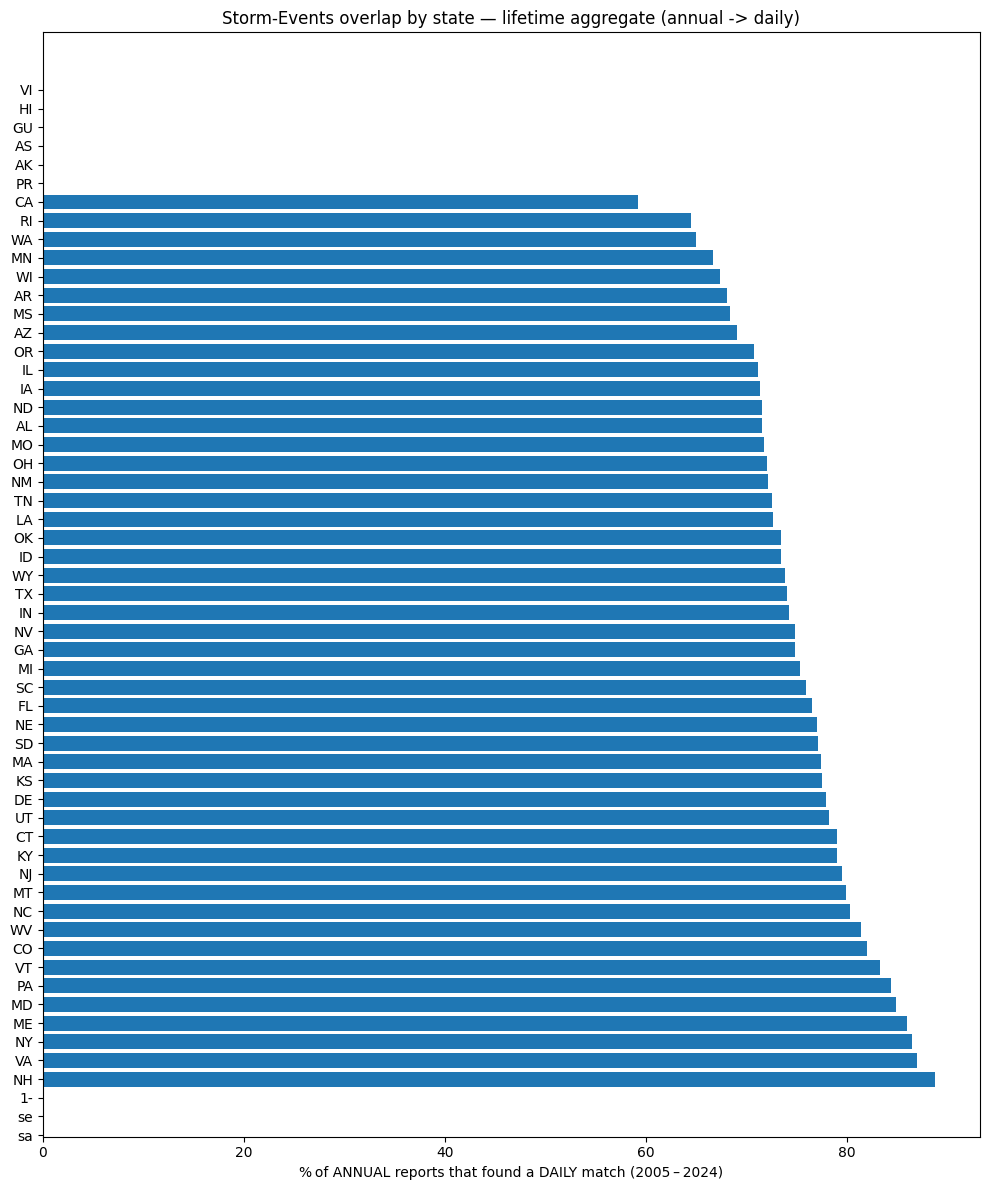

In [144]:
plot_df = (
    totals
      .reset_index()                  
      .dropna(subset=["STATE"])       
      .sort_values("ann_match_pct")   
)

y = plot_df["STATE"]
x = plot_df["ann_match_pct"]

plt.figure(figsize=(10, 12))
bars = plt.barh(y, x)


plt.xlabel("% of ANNUAL reports that found a DAILY match (2005 – 2024)")
plt.title("Storm‑Events overlap by state — lifetime aggregate (annual -> daily)")
plt.tight_layout()
plt.gca().invert_yaxis() #NOTE: THIS MEANS THE LOWER THE PERCENTAGE THE HIGHER THE ERROR
plt.savefig("state_overlap_pct_bar_ANN.png", dpi=200)
plt.show()
